# Compare different scenarios 

In [27]:
import matplotlib.pyplot as plt
import sys
# sys.path.append('G:/My Drive/Research/adaptation_abm/code')
sys.path.append('/home/twilliams/adaptation_abm/code')
import model.model as mod
import model.base_inputs as inp
import plot.scenario_comparison as plt_sc
import imp
import numpy as np
import pickle
import copy
imp.reload(mod)

<module 'model.model' from '/home/twilliams/adaptation_abm/code/model/model.py'>

## Define scenarios 

In [37]:
# load default params
inp_base = inp.compile()
#### OR ####
# load from POM experiment
f = '../../outputs/2019_10_15_no_upr_wealth/POM/50000_10reps/input_params_0.pkl'
f = '../../outputs/2019_10_10/POM/100000_10reps/input_params_0.pkl'
inp_base = pickle.load(open(f, 'rb'))

# manually specify some variables (common to all scenarios)
inp_base['model']['T'] = 50
inp_base['model']['n_agents'] = 60
inp_base['model']['exp_name'] = 'scenario_compare'
inp_base['agents']['adap_type'] = 'always'
inp_base['model']['seed'] = 0

# define some scenarios
## adaptation scenarios
scenarios = {
    'baseline' : {'model' : {'adaptation_option' : 'none'}},
    'insurance' : {'model' : {'adaptation_option' : 'insurance'}},
    'cover_crop' : {'model' : {'adaptation_option' : 'cover_crop'}},
}

# ## shock scenarios
scenarios = {
    'baseline' : {'model' : {'adaptation_option' : 'none', 'shock' : False}},
    'shock' : {'model' : {'adaptation_option' : 'none', 'shock' : True}, 'climate' : {'shock_years' : [15], 'shock_rain' : 0.2}},
}

# scenarios = {
#     'shock_base' : {'model' : {'adaptation_option' : 'none', 'shock' : True}, 'climate' : {'shock_years' : [25], 'shock_rain' : 0.1}},
#     'shock_ins' : {'model' : {'adaptation_option' : 'insurance', 'shock' : True}, 'climate' : {'shock_years' : [25], 'shock_rain' : 0.1}},
# }

In [38]:
# inp_base['adaptation']['burnin_period'] = 10
# inp_base['adaptation']['cover_crop']['cost_factor'] = 1
# inp_base['agents']['wealth_init_mean'] = 40000
# inp_base['agents']['n_plots_init'] = [8,11,100]
# inp_base['adaptation']['cover_crop']['N_fixation_min'] = 40
# inp_base['adaptation']['cover_crop']['N_fixation_max'] = 200
# inp_base['model']['shock'] = False

In [39]:
# inp_base['adaptation']['cover_crop']['cost_factor'] = 1
# inp_base['adaptation']['insurance']['climate_percentile'] = 0.01
# inp_base['land']['rain_cropfail_low_SOM'] = 0.25
# inp_base['climate']['rain_mu'] = 0.5

In [40]:
inp_base

{'model': {'n_agents': 60,
  'T': 50,
  'exp_name': 'scenario_compare',
  'seed': 0,
  'sim_id': 0,
  'rep_id': 0,
  'adaptation_option': 'none',
  'shock': False},
 'agents': {'adap_type': 'always',
  'land_area_init': [1, 1.5, 2],
  'wealth_init_mean': 15964.047087075382,
  'wealth_init_sd': 0,
  'max_neg_wealth': 0,
  'cash_req_mean': 6303.202823408928,
  'cash_req_sd': 0,
  'crop_sell_price': 2.17,
  'fertilizer_cost': 13.2,
  'livestock_cost': 3000},
 'land': {'organic_N_min_init': 4000,
  'organic_N_max_init': 4000,
  'max_organic_N': 8000,
  'fast_mineralization_rate': 0.19551363875859407,
  'slow_mineralization_rate': 0.02,
  'loss_max': 0.13696759780993142,
  'loss_min': 0.05,
  'max_yield': 6590,
  'rain_crit': 0.8,
  'rain_cropfail_high_SOM': 0,
  'rain_cropfail_low_SOM': 0.25431957197534355,
  'random_effect_sd': 0.3,
  'crop_CN_conversion': 50,
  'residue_CN_conversion': 109.20387716363348,
  'residue_loss_factor': 0.9,
  'residue_multiplier': 2,
  'wealth_N_conversion': 0

## Run the model

In [41]:
mods = {}
for name, vals in scenarios.items():
    # change the params
    params = copy.copy(inp_base)
    for k, v in vals.items():
        for k2, v2 in v.items():
            params[k][k2] = v2
    
    # initialize and run model
    m = mod.Model(params)
    for t in range(m.T):
        m.step()
    mods[name] = m

In [42]:
# # print(mods['baseline'].agents.income[20])
# print(mods['insurance'].agents.income[20])
# print(mods['insurance'].agents.coping_rqd[20])
# # print(mods['baseline'].agents.wealth[20])
# print(mods['insurance'].agents.wealth[20])
# print(mods['insurance'].agents.wealth[21])


In [44]:
# plt.plot(m.climate.rain, m.land.yields,'o')

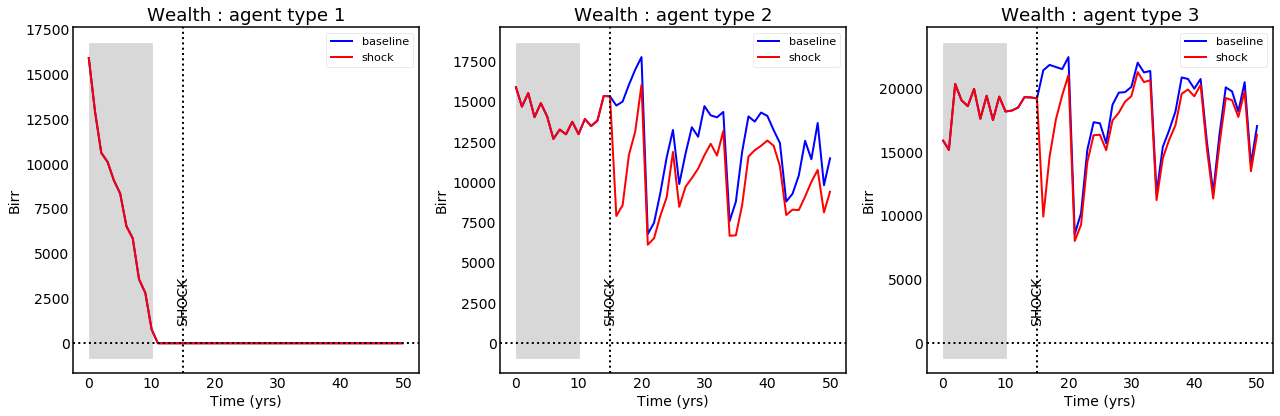

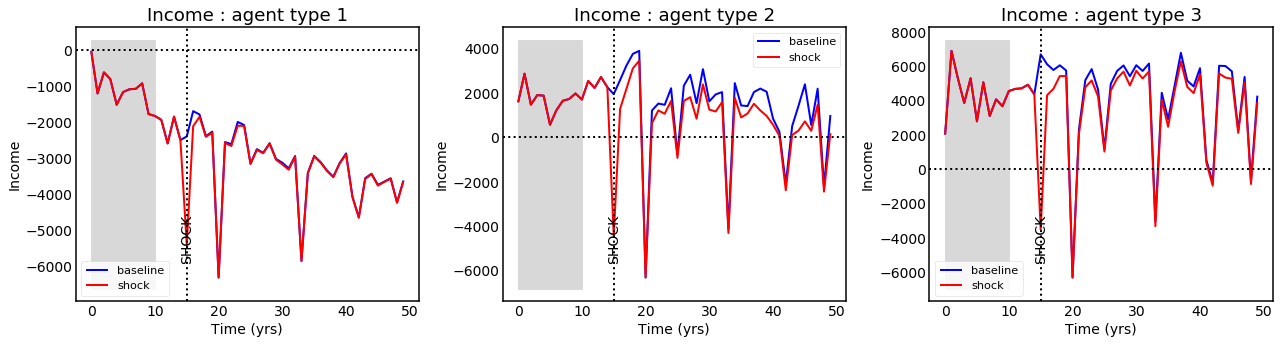

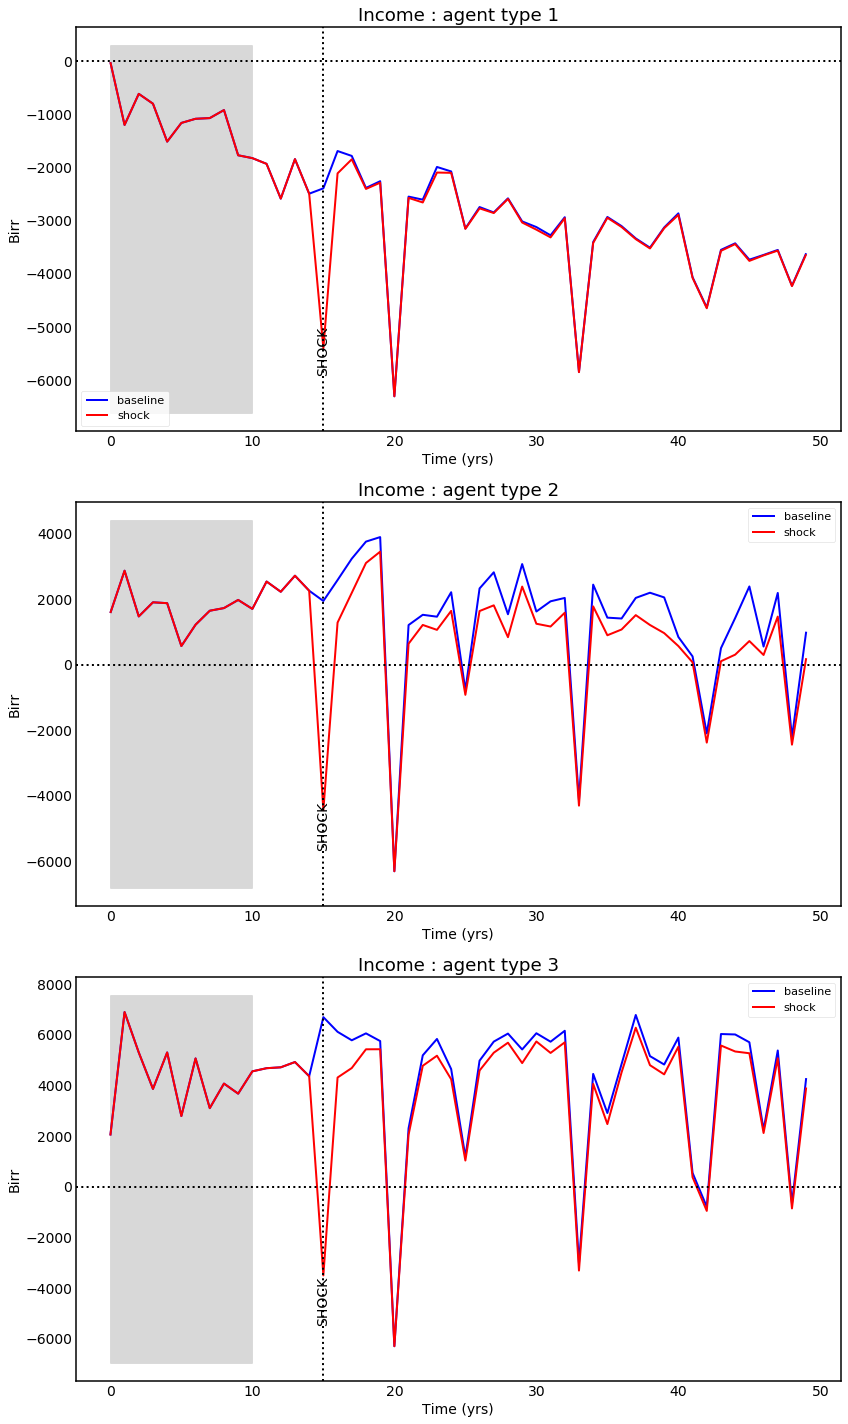

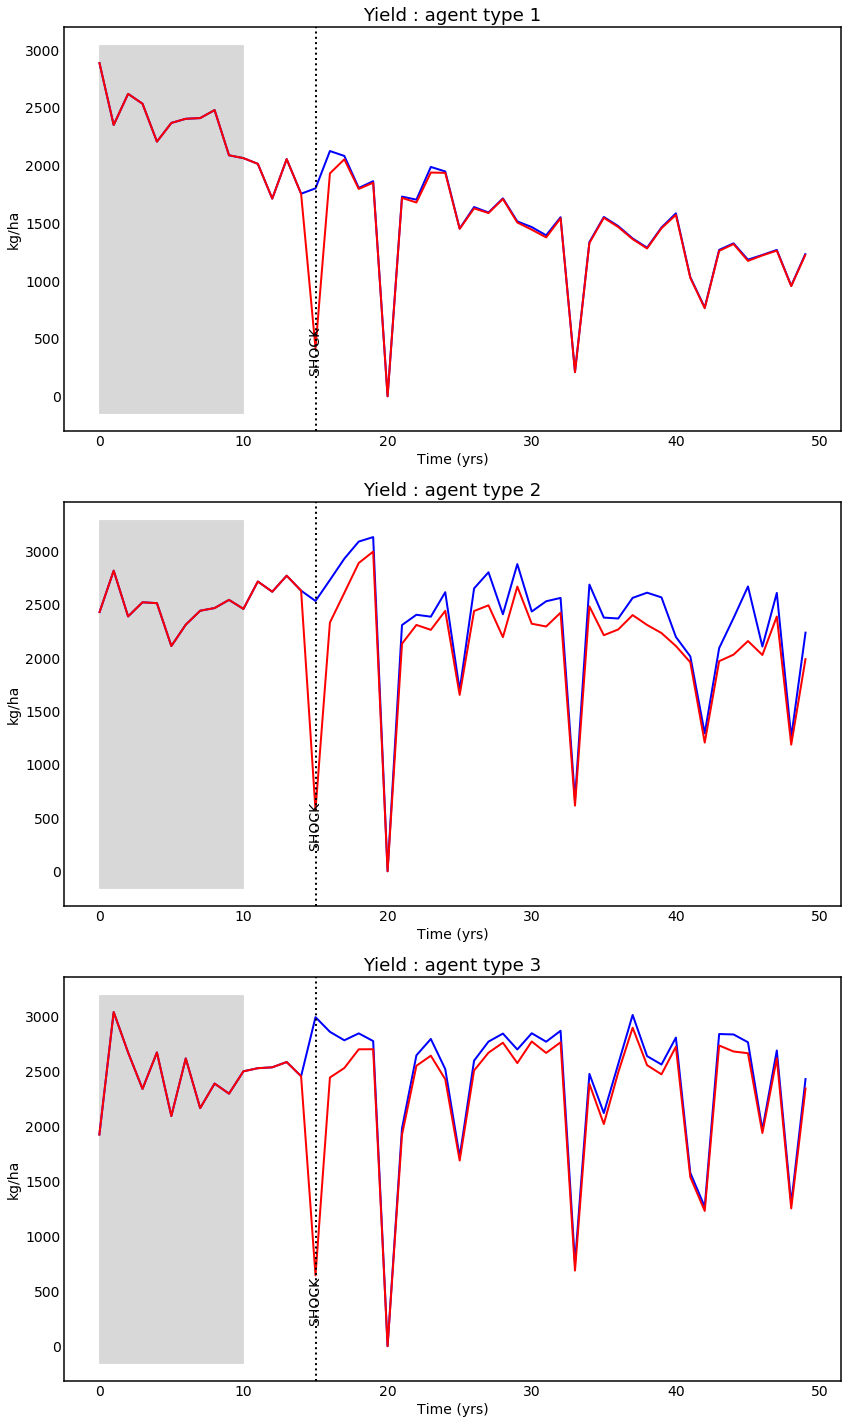

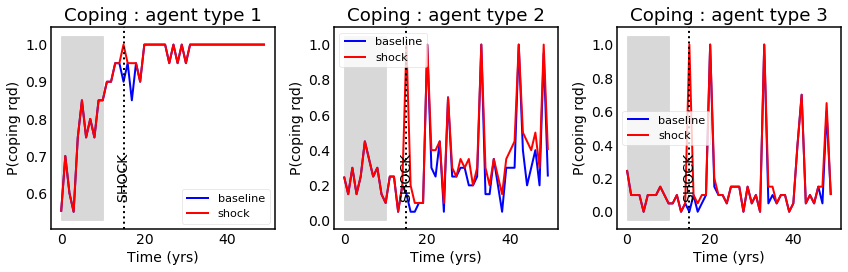

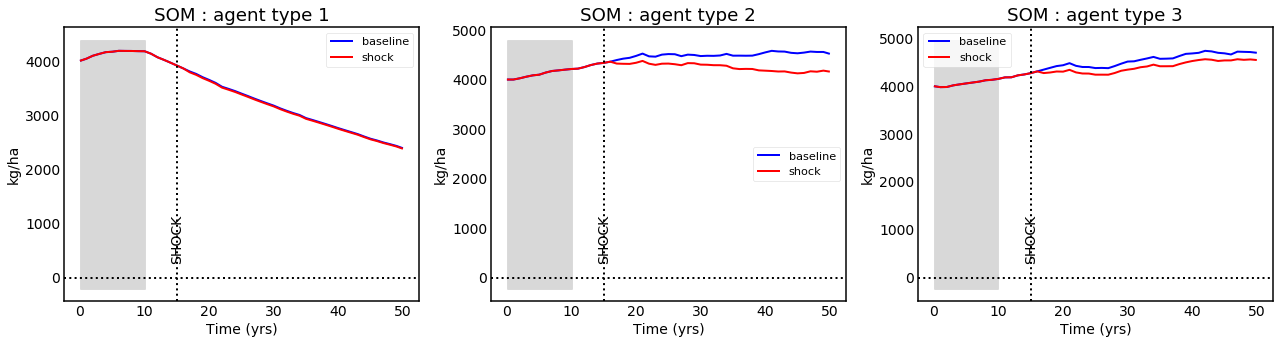

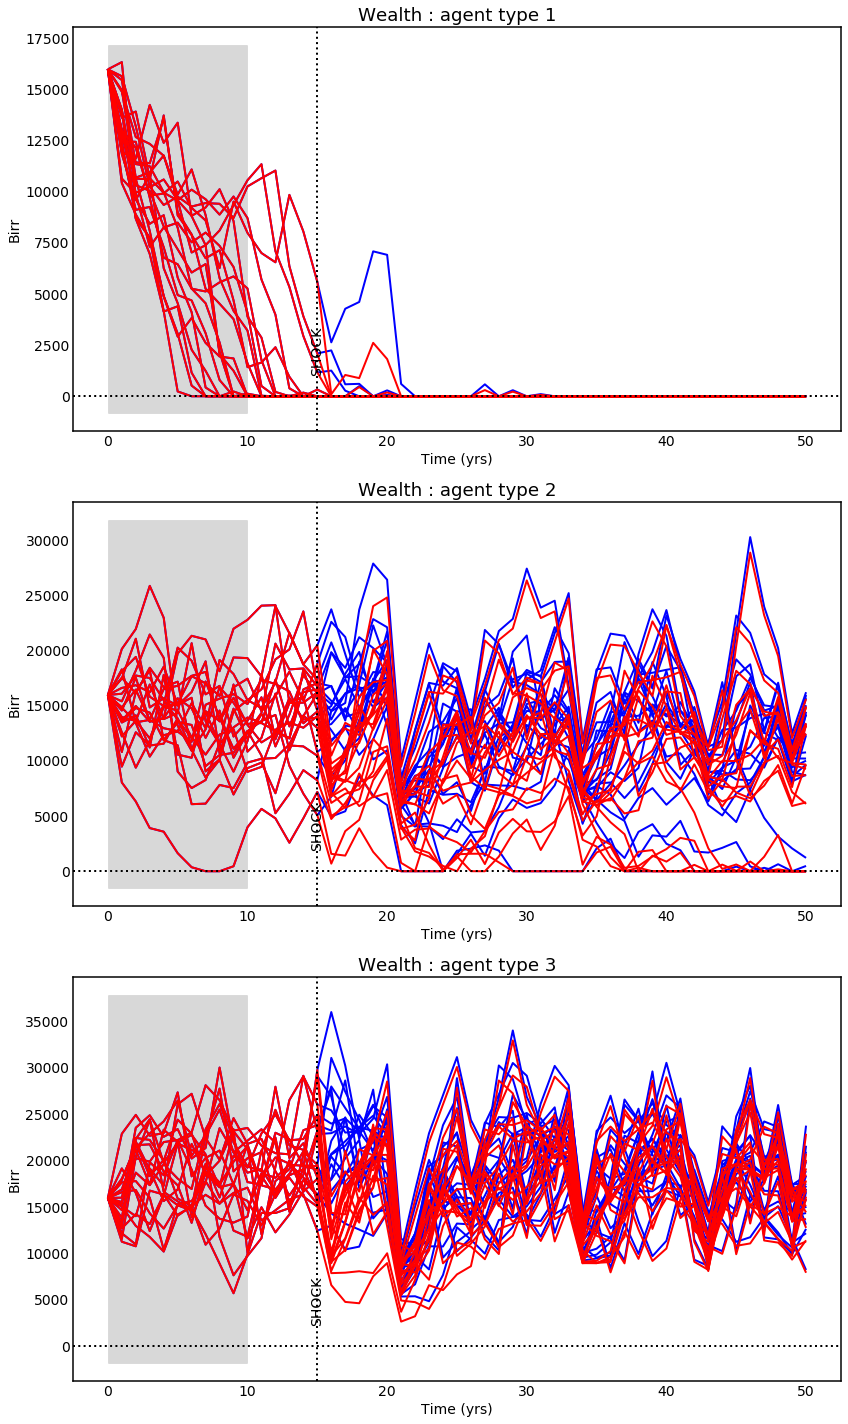

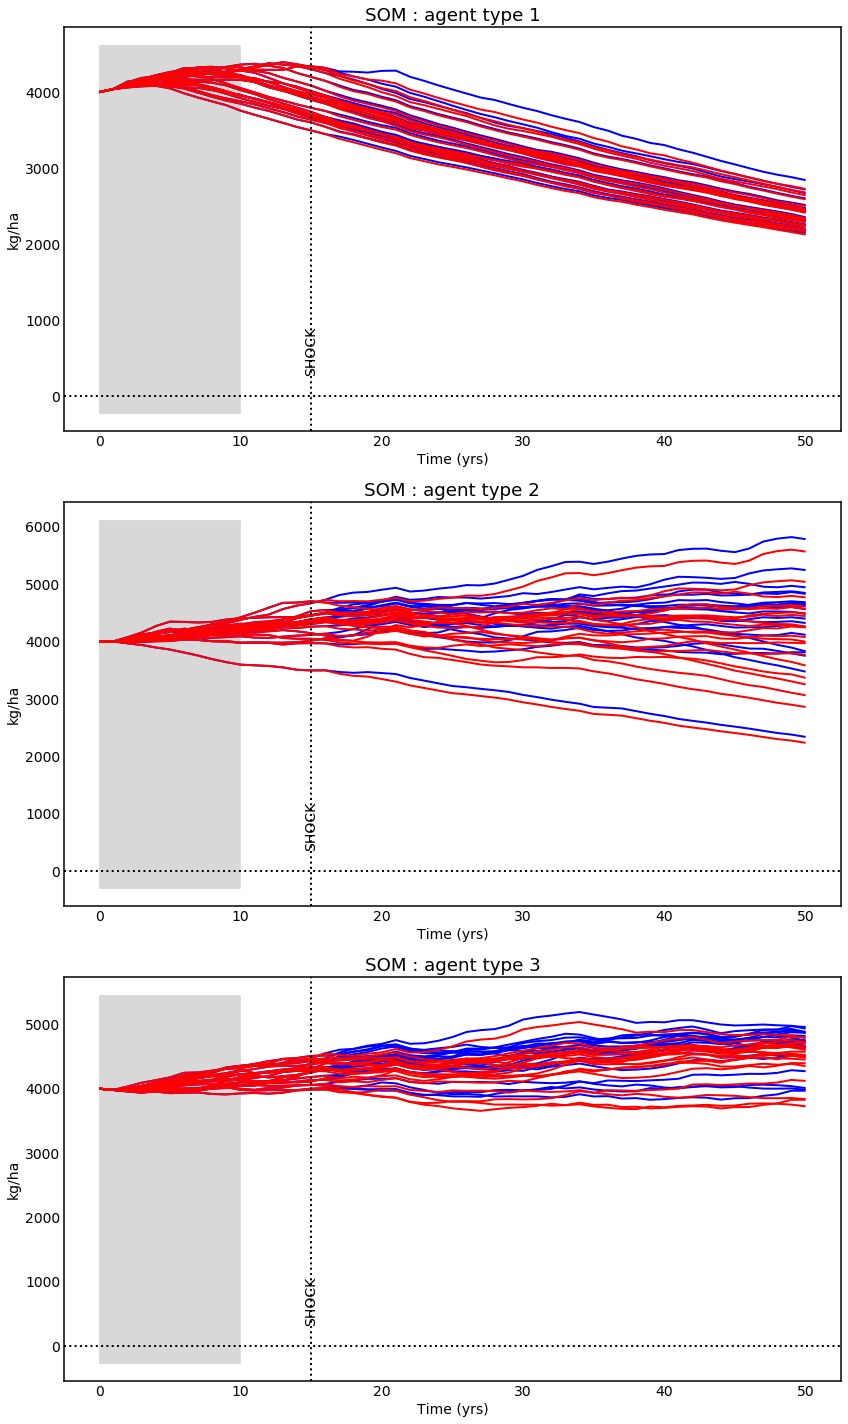

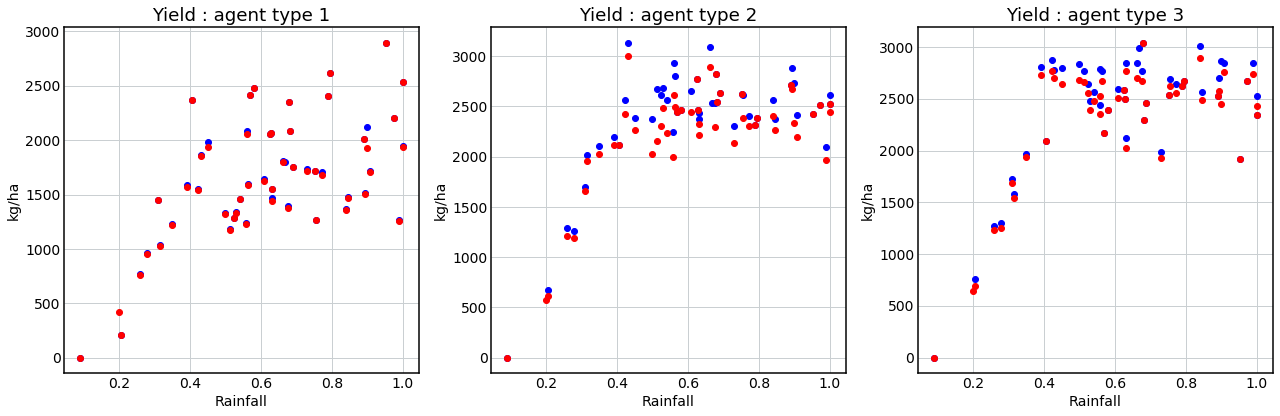

In [45]:
imp.reload(plt_sc)
plt_sc.main(mods, save=False)